# Test
This is an example of ipython notebook and linear systems
$$H(s) = \frac{1}{s+1}$$


In [10]:
%matplotlib inline

import matplotlib
import numpy as np
import sympy
from sympy import *
import numpy 

sympy.init_printing()
s = Symbol('s')

In [11]:
from control import matlab
import scipy
import matplotlib.pyplot as plt


In [12]:
def stepResponse(Ts,*args,**kwargs):
    num = Poly(Ts.as_numer_denom()[0],s).all_coeffs()
    den = Poly(Ts.as_numer_denom()[1],s).all_coeffs()
    tf = matlab.tf(map(float,num),map(float,den))
    y,t = matlab.step([tf],*args,**kwargs)
    plt.plot(t,y)
    plt.title("Step Response")
    plt.grid()
    plt.xlabel("time (s)")
    plt.ylabel("y(t)")
    info ="OS: %f%s"%(round((y.max()/y[-1]-1)*100,2),'%')
    try:
        i10 = next(i for i in range(0,len(y)-1) if y[i]>=y[-1]*.10)
        Tr = round(t[next(i for i in range(i10,len(y)-1) if y[i]>=y[-1]*.90)]-t[i10],2)
    except StopIteration:
        Tr = "unknown"
    try:
        Ts = round(t[next(len(y)-i for i in range(2,len(y)-1) if abs(y[-i]/y[-1])>1.02)]-t[0],2)
    except StopIteration:
        Ts = "unknown"     
    info += "\nTr: %s"%(Tr)
    info +="\nTs: %s"%(Ts)
    #print info
    plt.legend([info],loc=4)
    plt.show()

In [13]:
G1 = 1/(s+1)

In [14]:
G2 = 10*s/(s+10)

In [15]:
G2

In [16]:
G=G1*G2

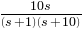

In [17]:
G.simplify()

In [18]:
stepResponse(G1)

TypeError: The numerator and denominator inputs must be scalars or vectors (for
SISO), or lists of lists of vectors (for SISO or MIMO).

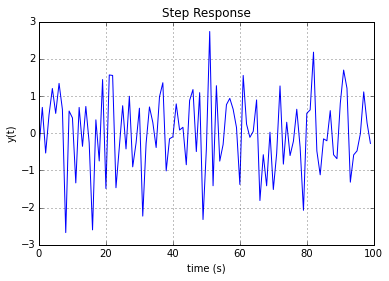

In [20]:
x = numpy.random.randn(100,1)
plt.figure()
plt.plot(x)
plt.title("Step Response")
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("y(t)")
plt.show()